# Importing libraries & data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as scs
from scipy.stats import probplot
from sklearn.linear_model import LinearRegression
import pylab
from numpy import quantile,logical_or
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import boxcox

In [2]:
df=pd.read_csv('/Users/Jeff/Downloads/Life Expectancy Data 2.csv')

In [3]:
df.sample(20)

Country  Year      Status  Life expectancy   Adult Mortality  \
486             Cameroon  2009  Developing              54.8            373.0   
1051             Grenada  2006  Developing              71.7            167.0   
641              Croatia  2015   Developed              78.0             95.0   
756             Djibouti  2012  Developing              62.2            263.0   
611                Congo  2012  Developing              63.7            273.0   
1773          Mozambique  2006  Developing              51.2            434.0   
2828          Uzbekistan  2013  Developing              69.1            185.0   
982              Georgia  2011  Developing              73.9            127.0   
2137  Russian Federation  2013  Developing              70.0            229.0   
583             Colombia  2008  Developing              73.5            146.0   
552                Chile  2007  Developing              78.9              9.0   
1180             Iceland  2005   Developed              81.0             62.0   
1416          Kyrgyzstan  2009  Developing              68.5             21.0   
1534           Lithuania  2003   Developed              71.6             22.0   
2631                Togo  2001  Developing              54.6            345.0   
780   Dominican Republic  2005  Developing              69.7             28.0   
1034              Greece  2007  Developing              79.4              8.0   
2632                Togo  2000  Developing              54.6            339.0   
1761             Morocco  2002  Developing              69.5             15.0   
214             Barbados  2009  Developing              74.6             19.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
486              54     5.89                9.042541          8.0       251   
1051              0     9.06              662.266369         91.0         0   
641               0      NaN                0.000000         94.0       206   
756               1     0.52              217.212579         81.0       709   
611               7     0.01                0.000000         62.0       260   
1773             78     1.20               58.596445         75.0       183   
2828             17     0.01               19.162470         99.0         0   
982               1     8.14              198.948760         89.0        64   
2137             14    10.58             1529.497771         97.0      2339   
583              14     4.45              978.070410         92.0         0   
552               2     7.39              209.487587         92.0         0   
1180              0     7.05            10631.203790          NaN         0   
1416              4     2.39                0.000000         96.0         1   
1534              0    11.29               80.997101         95.0         1   
2631             14     0.95                2.048575          NaN      1833   
780               7     5.71              289.741865         87.0         0   
1034              0     9.67             3632.243121         95.0         2   
2632             14     1.10                2.029644          NaN      3578   
1761             25     0.46               66.729339         92.0      6000   
214               0     8.46              327.161813         93.0         0   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS           GDP  \
486   ...   79.0               5.70          8.0        6.3    123.195380   
1051  ...   91.0               5.99         91.0        0.1   6764.722867   
641   ...   94.0                NaN         94.0        0.1  11579.667400   
756   ...   81.0               8.95         81.0        1.9   1536.156850   
611   ...   61.0               3.98         85.0        3.3           NaN   
1773  ...   73.0               6.51         78.0       16.3    385.756714   
2828  ...   99.0               6.32         99.0        0.1    197.551233   
982   ...   88.0               9.38    

# Data cleaning

## Add new column about hapinness

In [4]:
# We upload the hapiness csv file coming from Aurore and Diagou Github
happy=pd.read_csv('/Users/Jeff/Ironhack/248_Repo/Projects/Regression analysis/2020.hapiness.csv')

In [5]:
# We rename the column corresponding to the country name in order to do the merger on it
happy.rename(columns={'Country name': 'Country'}, inplace=True)

In [6]:
# We merge the dataframes
df=pd.merge(df, happy[['Country','Ladder score']], how='inner', on='Country')

In [7]:
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0               8.16         65.0        0.1  584.259210  33736494.0   
1               8.18         62.0        0.1  612.696514    327582.0   
2               8.13         64.0        0.1  631.744976  31731688.0   
3               8.52         67.0        0.1  669.959000   3696958.0   
4               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  Ladder score  
0                            0.479       10.1        2.5669  
1                            0.476       10.0        2.5669  
2                            0.470        9.9        2.5669  
3                            0.463        9.8        2.5669  
4                            0.454        9.5        2.5669  

[5 rows x 23 columns]

## Missing values

In [8]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Ladder score'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2112 entries, 0 to 2111
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2112 non-null   object 
 1   Year                             2112 non-null   int64  
 2   Status                           2112 non-null   object 
 3   Life expectancy                  2112 non-null   float64
 4   Adult Mortality                  2112 non-null   float64
 5   infant deaths                    2112 non-null   int64  
 6   Alcohol                          1969 non-null   float64
 7   percentage expenditure           2112 non-null   float64
 8   Hepatitis B                      1694 non-null   float64
 9   Measles                          2112 non-null   int64  
 10   BMI                             2096 non-null   float64
 11  under-five deaths                2112 non-null   int64  
 12  Polio               

In [10]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            143
percentage expenditure               0
Hepatitis B                        418
Measles                              0
 BMI                                16
under-five deaths                    0
Polio                               17
Total expenditure                  145
Diphtheria                          17
 HIV/AIDS                            0
GDP                                 96
Population                         192
 thinness  1-19 years               16
 thinness 5-9 years                 16
Income composition of resources      0
Schooling                            0
Ladder score                         0
dtype: int64

We consider that the population amount doesn't influence the life expentancy, so we decide to drop the column.

In [11]:
drop_cols=[]

In [12]:
drop_cols.append('population')

We decide to drop the rows where the column 'Hepatitis B', 'GDP', 'thinness', 'Life expectancy' and 'Total Expenditure' is missing.

In [13]:
df.drop(df[df['Hepatitis B'].isna()].index.values.tolist(), axis=0, inplace=True)

In [14]:
df.drop(df[df['GDP'].isna()].index.values.tolist(), axis=0, inplace=True)

In [15]:
df.drop(df[df['Total expenditure'].isna()].index.values.tolist(), axis=0, inplace=True)

In [16]:
df.drop(df[df[' thinness  1-19 years'].isna()].index.values.tolist(), axis=0, inplace=True)

In [17]:
df.drop(df[df[' thinness 5-9 years'].isna()].index.values.tolist(), axis=0, inplace=True)

In [18]:
df.drop(df[df['Life expectancy '].isna()].index.values.tolist(), axis=0, inplace=True)

## Export

We export the data as csv in order to do some vizualisation on Tableau

In [93]:
df.to_csv('Life expectancy.csv', sep='/', index=False)

In [20]:
df.shape

(1490, 23)

## Columns manipulation

In [21]:
df1=df.copy()

Now we identify every columns that doesn't influence the life expectancy and drop them:
* Country
* Population

In [22]:
drop_cols.append('country')

We rename all the columns in order to delete space

In [23]:
df1.columns=['country','year','status','life_expectancy','adult_mortality','infant_deaths','alcohol','percentage_expenditure','hepatitis_b','measles','bmi','under-five deaths','polio','total_expenditure','diphtheria','hiv','gdp','population','thinness_1-19_years','thinness_5-9_years','income_composition_of_resources','schooling','happiness']

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1490 entries, 0 to 2111
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          1490 non-null   object 
 1   year                             1490 non-null   int64  
 2   status                           1490 non-null   object 
 3   life_expectancy                  1490 non-null   float64
 4   adult_mortality                  1490 non-null   float64
 5   infant_deaths                    1490 non-null   int64  
 6   alcohol                          1490 non-null   float64
 7   percentage_expenditure           1490 non-null   float64
 8   hepatitis_b                      1490 non-null   float64
 9   measles                          1490 non-null   int64  
 10  bmi                              1490 non-null   float64
 11  under-five deaths                1490 non-null   int64  
 12  polio               

As we can see, we identify that the column 'status' is object type.

In [25]:
# Identify all the possible value of Status column
df1.status.value_counts()

Developing    1218
Developed      272
Name: status, dtype: int64

In [26]:
# We replace the categorical values by numerical values
dct={
    'Developed':2,
    'Developing':1
    }

df1.status=df1.status.map(dct)

In order to analyze the column Year, we will reaffect value to every single year

In [27]:
df1.year.value_counts()

2014    117
2013    117
2011    117
2012    116
2010    115
2009    113
2008    111
2007    108
2006    104
2005    100
2004     94
2003     86
2002     73
2001     60
2000     57
2015      2
Name: year, dtype: int64

In [28]:
# We replace the year by numerical values
dct={
    2000:1,
    2001:2,
    2002:3,
    2003:4,
    2004:5,
    2005:6,
    2006:7,
    2007:8,
    2008:9,
    2009:10,
    2010:11,
    2011:12,
    2012:13,
    2013:14,
    2014:15,
    2015:16
}


df1.year=df1.year.map(dct)

As the following columns are higly correlated with others. We decide to drop those column in order to satisfy multicollinearity assumption:
* under-five deaths
* schooling
* polio
* diphtheria
* hepatitis_b

In [29]:
drop_cols.append('under-five deaths')
drop_cols.append('schooling')
drop_cols.append('income_composition_of_resources')
drop_cols.append('diphtheria')
drop_cols.append('happiness')

We drop the column in the list drop_cols

In [30]:
df1.drop(drop_cols, axis=1, inplace=True)

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1490 entries, 0 to 2111
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    1490 non-null   int64  
 1   status                  1490 non-null   int64  
 2   life_expectancy         1490 non-null   float64
 3   adult_mortality         1490 non-null   float64
 4   infant_deaths           1490 non-null   int64  
 5   alcohol                 1490 non-null   float64
 6   percentage_expenditure  1490 non-null   float64
 7   hepatitis_b             1490 non-null   float64
 8   measles                 1490 non-null   int64  
 9   bmi                     1490 non-null   float64
 10  polio                   1490 non-null   float64
 11  total_expenditure       1490 non-null   float64
 12  hiv                     1490 non-null   float64
 13  gdp                     1490 non-null   float64
 14  thinness_1-19_years     1490 non-null   

As we can see, now there is no more non-numerical values in the columns

In [32]:
df1.isna().sum()

year                      0
status                    0
life_expectancy           0
adult_mortality           0
infant_deaths             0
alcohol                   0
percentage_expenditure    0
hepatitis_b               0
measles                   0
bmi                       0
polio                     0
total_expenditure         0
hiv                       0
gdp                       0
thinness_1-19_years       0
thinness_5-9_years        0
dtype: int64

As we can see there is no more missing values

We check if there is any outlier in the column life_expectancy

In [33]:
df1.life_expectancy.describe()

count    1490.000000
mean       70.114161
std         9.155880
min        44.000000
25%        64.725000
50%        72.900000
75%        75.875000
max        89.000000
Name: life_expectancy, dtype: float64

As we can see the min value is 44 and the max value is 89 which is coherent. We didn't identify any outlier.

In [34]:
df1.head()

year  status  life_expectancy  adult_mortality  infant_deaths  alcohol  \
0    16       1             65.0            263.0             62     0.01   
1    15       1             59.9            271.0             64     0.01   
2    14       1             59.9            268.0             66     0.01   
3    13       1             59.5            272.0             69     0.01   
4    12       1             59.2            275.0             71     0.01   

   percentage_expenditure  hepatitis_b  measles   bmi  polio  \
0               71.279624         65.0     1154  19.1    6.0   
1               73.523582         62.0      492  18.6   58.0   
2               73.219243         64.0      430  18.1   62.0   
3               78.184215         67.0     2787  17.6   67.0   
4                7.097109         68.0     3013  17.2   68.0   

   total_expenditure  hiv         gdp  thinness_1-19_years  thinness_5-9_years  
0               8.16  0.1  584.259210                 17.2                17.3  
1               8.18  0.1  612.696514                 17.5                17.5  
2               8.13  0.1  631.744976                 17.7                17.7  
3               8.52  0.1  669.959000                 17.9                18.0  
4               7.87  0.1   63.537231                 18.2                18.2

# Modeling

We set a new scale for every columns in order to compare the coef of each column

In [35]:
df1.columns

Index(['year', 'status', 'life_expectancy', 'adult_mortality', 'infant_deaths',
       'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi',
       'polio', 'total_expenditure', 'hiv', 'gdp', 'thinness_1-19_years',
       'thinness_5-9_years'],
      dtype='object')

In [36]:
df_mod=pd.DataFrame(MinMaxScaler().fit_transform(df1))
df_mod.columns=df1.columns
df_mod.head()

year  status  life_expectancy  adult_mortality  infant_deaths  alcohol  \
0  1.000000     0.0         0.466667         0.362881       0.038750      0.0   
1  0.933333     0.0         0.353333         0.373961       0.040000      0.0   
2  0.866667     0.0         0.353333         0.369806       0.041250      0.0   
3  0.800000     0.0         0.344444         0.375346       0.043125      0.0   
4  0.733333     0.0         0.337778         0.379501       0.044375      0.0   

   percentage_expenditure  hepatitis_b   measles       bmi     polio  \
0                0.003759     0.649485  0.008780  0.253333  0.031250   
1                0.003878     0.618557  0.003743  0.245926  0.572917   
2                0.003861     0.639175  0.003271  0.238519  0.614583   
3                0.004123     0.670103  0.021203  0.231111  0.666667   
4                0.000374     0.680412  0.022923  0.225185  0.677083   

   total_expenditure  hiv       gdp  thinness_1-19_years  thinness_5-9_years  
0           0.531226  0.0  0.004889             0.628253            0.610714  
1           0.532731  0.0  0.005127             0.639405            0.617857  
2           0.528969  0.0  0.005287             0.646840            0.625000  
3           0.558315  0.0  0.005608             0.654275            0.635714  
4           0.509406  0.0  0.000519             0.665428            0.642857

We shuffle the database in order to satisfied the autocorrelation asumptions

In [37]:
df_mod=df_mod.sample(frac=1)

We determine X and y

In [38]:
y=df_mod.life_expectancy

X=df_mod.drop('life_expectancy', axis=1)

Create the model

In [39]:
from statsmodels.formula.api import ols
from statsmodels.api import OLS
from statsmodels.api import add_constant

In [40]:
OLS(y, add_constant(X)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     331.9
Date:                Fri, 02 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:00:17   Log-Likelihood:                 1358.7
No. Observations:                1490   AIC:                            -2685.
Df Residuals:                    1474   BIC:                            -2600.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.4887      0.016     30.659      0.000       0.457       0.520
year                       0.0012      0.010      0.125      0.900      -0.018       0.020
status                     0.0416      0.009      4.657      0.000       0.024       0.059
adult_mortality           -0.3901      0.019    -20.451      0.000      -0.428      -0.353
infant_deaths             -0.0428      0.045     -0.957      0.339      -0.131       0.045
alcohol                    0.0750      0.016      4.751      0.000       0.044       0.106
percentage_expenditure     0.0141      0.072      0.196      0.844      -0.127       0.155
hepatitis_b                0.0112      0.011      0.984      0.325      -0.011       0.034
measles                    0.0279      0.038      0.738      0.461      -0.046       0.102
bmi                        0.1341      0.011     12.555      0.000       0.113       0.155
polio                      0.0947      0.013      7.379      0.000       0.070       0.120
total_expenditure          0.0298      0.015      1.933      0.053      -0.000       0.060
hiv                       -0.5055      0.025    -19.855      0.000      -0.555      -0.456
gdp                        0.2507      0.066      3.808      0.000       0.122       0.380
thinness_1-19_years       -0.1229      0.039     -3.139      0.002      -0.200      -0.046
thinness_5-9_years         0.0140      0.040      0.345      0.730      -0.065       0.093
==============================================================================
Omnibus:                      105.625   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.623
Skew:                          -0.486   Prob(JB):                     2.72e-44
Kurtosis:                       4.512   Cond. No.                         68.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## P-Hacking

In [41]:
def foo(col, X, y=y):
    if col:
        X1=X.drop(col, axis=1).copy()
    else:
        X1=X
    display(OLS(y,add_constant(X1)).fit().summary())
    return X1

In [47]:
X=foo('hepatitis_b',X)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     554.2
Date:                Fri, 02 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:01:26   Log-Likelihood:                 1357.5
No. Observations:                1490   AIC:                            -2695.
Df Residuals:                    1480   BIC:                            -2642.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4947      0.014     34.178      0.000       0.466       0.523
status                  0.0422      0.009      4.759      0.000       0.025       0.060
adult_mortality        -0.3888      0.019    -20.533      0.000      -0.426      -0.352
alcohol                 0.0716      0.015      4.711      0.000       0.042       0.101
bmi                     0.1340      0.011     12.724      0.000       0.113       0.155
polio                   0.1010      0.011      8.789      0.000       0.078       0.124
total_expenditure       0.0311      0.015      2.085      0.037       0.002       0.060
hiv                    -0.5053      0.025    -20.176      0.000      -0.554      -0.456
gdp                     0.2609      0.027      9.831      0.000       0.209       0.313
thinness_1-19_years    -0.1212      0.019     -6.457      0.000      -0.158      -0.084
==============================================================================
Omnibus:                      102.022   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.786
Skew:                          -0.474   Prob(JB):                     1.37e-42
Kurtosis:                       4.486   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
X

status  adult_mortality   alcohol       bmi     polio  \
1032     0.0         0.211911  0.188690  0.047407  1.000000   
661      0.0         0.159280  0.023516  0.894815  0.989583   
520      0.0         0.408587  0.083427  0.302222  0.854167   
1322     0.0         0.222992  0.330907  0.351111  1.000000   
1095     0.0         0.227147  0.346585  0.592593  0.927083   
...      ...              ...       ...       ...       ...   
150      0.0         0.340720  0.674132  0.802963  1.000000   
190      0.0         0.020776  0.288354  0.733333  0.958333   
384      1.0         0.085873  0.646697  0.804444  0.979167   
936      0.0         0.378116  0.153415  0.594074  1.000000   
1343     0.0         0.252078  0.356103  0.579259  0.062500   

      total_expenditure       hiv       gdp  thinness_1-19_years  
1032           0.412340  0.000000  0.012795             0.059480  
661            0.548533  0.000000  0.003236             0.130112  
520            0.256584  0.059406  0.004166             0.289963  
1322           0.212190  0.003960  0.036729             0.304833  
1095           0.352144  0.001980  0.001232             0.074349  
...                 ...       ...       ...                  ...  
150            0.413093  0.000000  0.019943             0.078067  
190            0.547028  0.000000  0.003496             0.092937  
384            0.406321  0.000000  0.263361             0.022305  
936            0.361174  0.000000  0.008367             0.074349  
1343           0.404063  0.001980  0.012228             0.211896  

[1490 rows x 9 columns]

## Asumptions

In [49]:
from Assumptions import Assumption_Tester_OLS as ast

Fitting linear regression

R^2: 0.771177871913783 

Coefficients
-------------------------------------
Intercept: 0.4946675538594299
status: 0.04
adult_mortality: -0.39
alcohol: 0.07
bmi: 0.13
polio: 0.1
total_expenditure: 0.03
hiv: -0.51
gdp: 0.26
thinness_1-19_years: -0.12

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


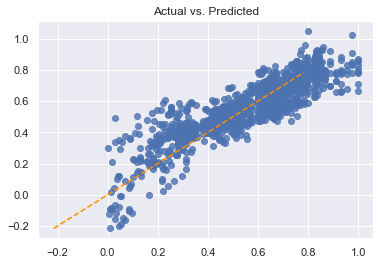

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with life_expectancy


total_expenditure    0.150198
Name: life_expectancy, dtype: float64


Parameters that are most likely FOLLOW linearity assumption and their correlation with life_expectancy


adult_mortality       -0.721902
alcohol                0.392742
bmi                    0.560962
polio                  0.363981
hiv                   -0.614060
gdp                    0.448964
thinness_1-19_years   -0.483216
Name: life_expectancy, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


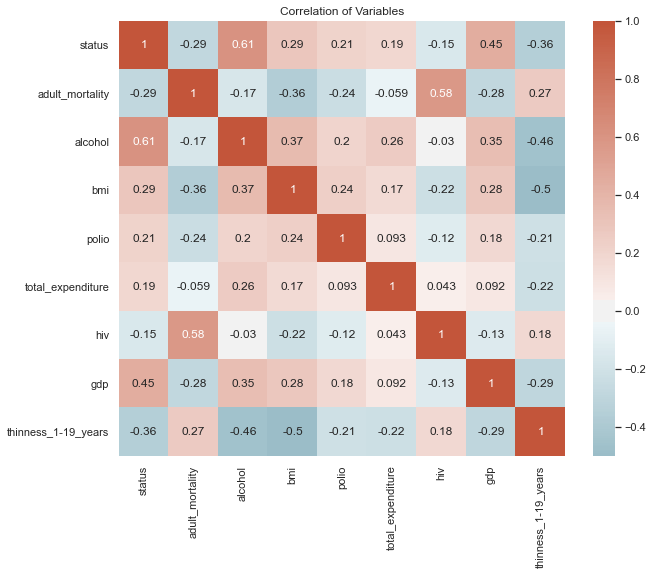

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
polio: 9.208451372908776
bmi: 5.554068345492854
total_expenditure: 5.164583730632943
alcohol: 4.247784628547444
adult_mortality: 3.697025456619564
thinness_1-19_years: 2.393513664845333
status: 2.239891764858242
gdp: 1.7101343095921278
hiv: 1.6498313033582623

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied

Assumption 3: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.03165523603688
Little to no autocorrelation 

Assumption satisfied

Assumption 4: Homoskedasticity of Error Terms
Residuals should have relative constant variance


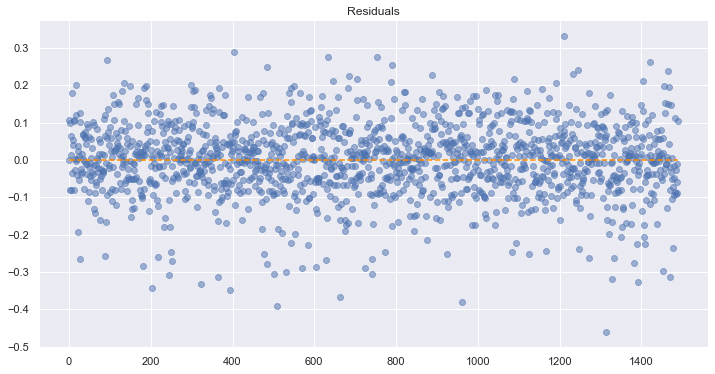

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 469.7905488214875,
 'pvalue for LM': 2.1198661971677136e-96,
 'F stats': 75.7752681733806,
 'pvalue for Fstats': 2.644262444257631e-115}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 4.987745301541239e-16
Residuals are not normally distributed


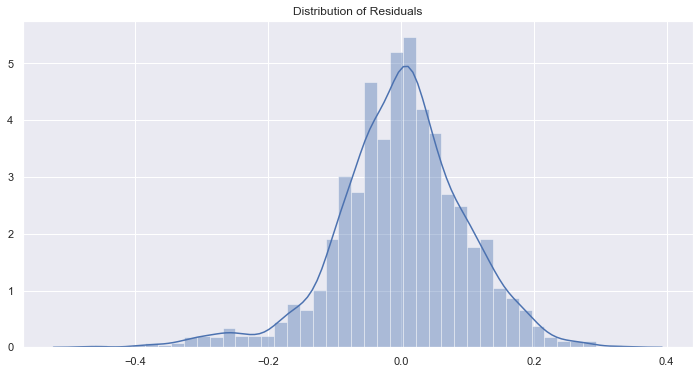


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


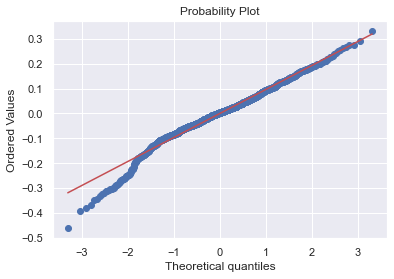


In your dataset you quite fat tails. You have 0.03 potential outliers (45 rows)


{'Satisfied': ['Multicollinearity', 'Autocorrelation'],
 'Potentially': ['Linearity', 'Autocorrelation', 'Sub-Normality'],
 'Violated': ['Normality']}

In [50]:
ast(X,y).run_all()

As we can see, residuals are non normal distributed. In order to manage that, we will drop those outliers.

Fitting linear regression

R^2: 0.771177871913783 

Coefficients
-------------------------------------
Intercept: 0.4946675538594299
status: 0.04
adult_mortality: -0.39
alcohol: 0.07
bmi: 0.13
polio: 0.1
total_expenditure: 0.03
hiv: -0.51
gdp: 0.26
thinness_1-19_years: -0.12

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


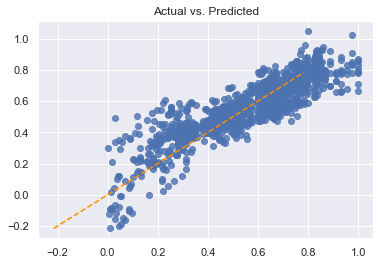

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with life_expectancy


total_expenditure    0.150198
Name: life_expectancy, dtype: float64


Parameters that are most likely FOLLOW linearity assumption and their correlation with life_expectancy


adult_mortality       -0.721902
alcohol                0.392742
bmi                    0.560962
polio                  0.363981
hiv                   -0.614060
gdp                    0.448964
thinness_1-19_years   -0.483216
Name: life_expectancy, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


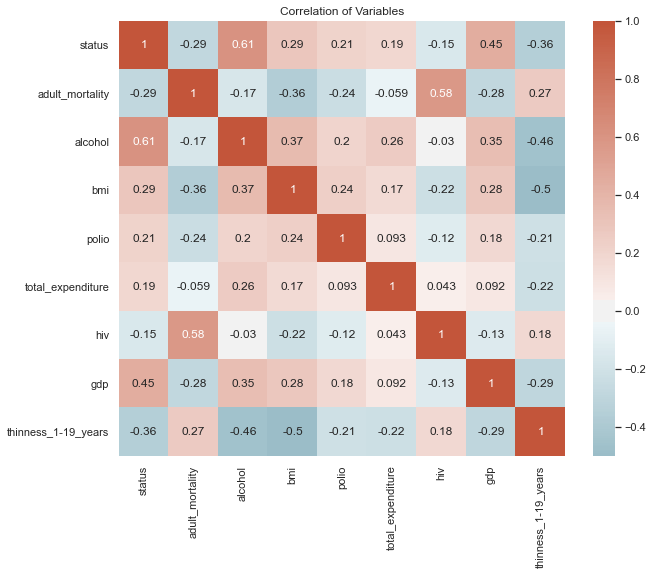

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
polio: 9.208451372908776
bmi: 5.554068345492854
total_expenditure: 5.164583730632943
alcohol: 4.247784628547444
adult_mortality: 3.697025456619564
thinness_1-19_years: 2.393513664845333
status: 2.239891764858242
gdp: 1.7101343095921278
hiv: 1.6498313033582623

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied

Assumption 3: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.03165523603688
Little to no autocorrelation 

Assumption satisfied

Assumption 4: Homoskedasticity of Error Terms
Residuals should have relative constant variance


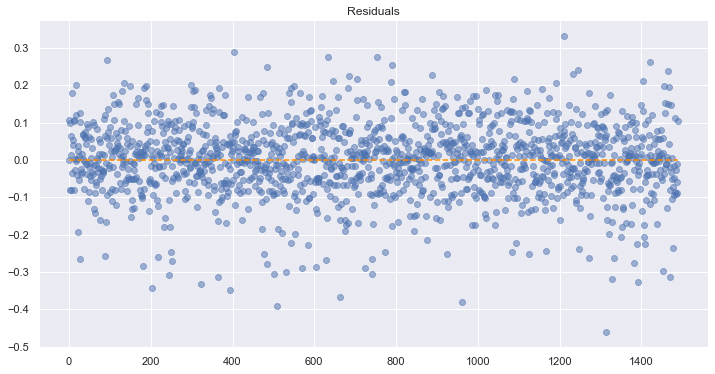

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 469.7905488214875,
 'pvalue for LM': 2.1198661971677136e-96,
 'F stats': 75.7752681733806,
 'pvalue for Fstats': 2.644262444257631e-115}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 4.987745301541239e-16
Residuals are not normally distributed


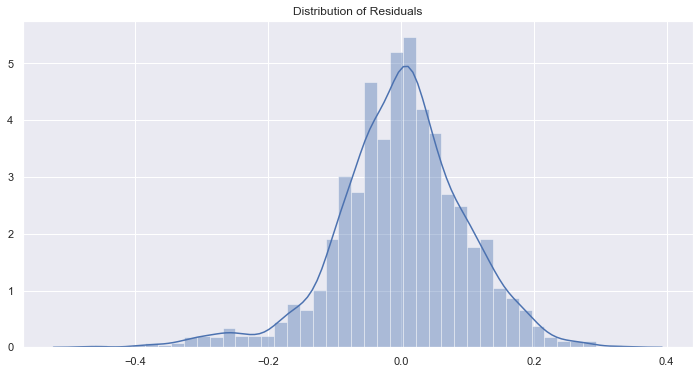


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


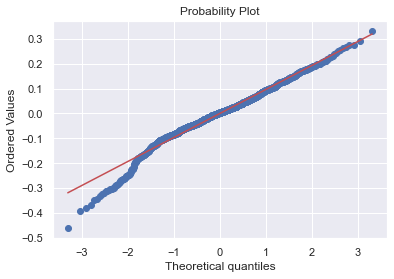


In your dataset you quite fat tails. You have 0.03 potential outliers (45 rows)


{'Satisfied': ['Multicollinearity', 'Autocorrelation'],
 'Potentially': ['Linearity', 'Autocorrelation', 'Sub-Normality'],
 'Violated': ['Normality']}

In [51]:
tester=ast(X,y)
tester.run_all()

In [52]:
tester.resid

array([ 0.10675887,  0.00133704, -0.08136476, ..., -0.05962284,
       -0.08812382,  0.10481577])

In [53]:
# Create a dataframe with tester.resid value
df_tester=pd.DataFrame(tester.resid)

In [54]:
# Identify outliers with IQR
q1 = df_tester[0].quantile(0.25)
q3 = df_tester[0].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.7*iqr
fence_high = q3+1.7*iqr
df_out = df_tester[0].loc[(df_tester[0] < fence_low) | (df_tester[0] > fence_high)]

In [55]:
# We can see that there is 53 outliers we need to drop
df_out.shape

(45,)

In [56]:
# Create the list of outliers index
outliers=df_out.index.tolist()

In [57]:
# Drop outliers in X
X_nez=X.reset_index(drop=True).drop(outliers)

In [58]:
# Drop outliers in y
y_nez=y.reset_index(drop=True).drop(outliers)

As y is not normally distibuted, we use the boxcox function in order to transform it in normal shape

In [59]:
y_norm=boxcox(y_nez+0.0000001)[0]

We launch again the assumptions functions

In [60]:
OLS(y_norm, add_constant(X_nez)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     610.9
Date:                Fri, 02 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:02:27   Log-Likelihood:                 1990.0
No. Observations:                1445   AIC:                            -3960.
Df Residuals:                    1435   BIC:                            -3907.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.4018      0.009    -42.863      0.000      -0.420      -0.383
status                  0.0283      0.006      5.016      0.000       0.017       0.039
adult_mortality        -0.3264      0.013    -25.356      0.000      -0.352      -0.301
alcohol                 0.0532      0.010      5.454      0.000       0.034       0.072
bmi                     0.0770      0.007     11.279      0.000       0.064       0.090
polio                   0.0606      0.007      8.350      0.000       0.046       0.075
total_expenditure       0.0566      0.010      5.823      0.000       0.038       0.076
hiv                    -0.1807      0.017    -10.771      0.000      -0.214      -0.148
gdp                     0.2228      0.017     12.993      0.000       0.189       0.256
thinness_1-19_years    -0.0878      0.012     -7.354      0.000      -0.111      -0.064
==============================================================================
Omnibus:                        8.821   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               11.516
Skew:                           0.053   Prob(JB):                      0.00316
Kurtosis:                       3.424   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
def foo(col, X_nez, y_nez=y_nez):
    if col:
        X1_nez=X_nez.drop(col, axis=1).copy()
    else:
        X1_nez=X_nez
    display(OLS(y_nez,add_constant(X1_nez)).fit().summary())
    return X1_nez

In [94]:
X_nez=foo('infant_deaths',X_nez)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     878.4
Date:                Fri, 02 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:25:52   Log-Likelihood:                 1850.5
No. Observations:                1800   AIC:                            -3685.
Df Residuals:                    1792   BIC:                            -3641.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.6271      0.009     66.729      0.000       0.609       0.645
status                  0.0618      0.007      9.291      0.000       0.049       0.075
adult_mortality        -0.5107      0.017    -30.901      0.000      -0.543      -0.478
bmi                     0.1034      0.010     10.839      0.000       0.085       0.122
total_expenditure       0.0808      0.013      6.371      0.000       0.056       0.106
hiv                    -0.4047      0.024    -17.032      0.000      -0.451      -0.358
gdp                     0.2814      0.022     13.013      0.000       0.239       0.324
thinness_1-19_years    -0.1287      0.015     -8.393      0.000      -0.159      -0.099
==============================================================================
Omnibus:                       51.882   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.366
Skew:                          -0.382   Prob(JB):                     2.12e-13
Kurtosis:                       3.442   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Fitting linear regression

R^2: 0.7930260584153913 

Coefficients
-------------------------------------
Intercept: -0.4018047636443659
status: 0.03
adult_mortality: -0.33
alcohol: 0.05
bmi: 0.08
polio: 0.06
total_expenditure: 0.06
hiv: -0.18
gdp: 0.22
thinness_1-19_years: -0.09

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


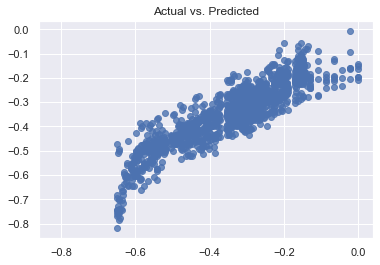

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with y


total_expenditure    0.224329
Name: y, dtype: float64


Parameters that are most likely FOLLOW linearity assumption and their correlation with y


adult_mortality       -0.753063
alcohol                0.437586
bmi                    0.575676
polio                  0.371673
hiv                   -0.536336
gdp                    0.501996
thinness_1-19_years   -0.509219
Name: y, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


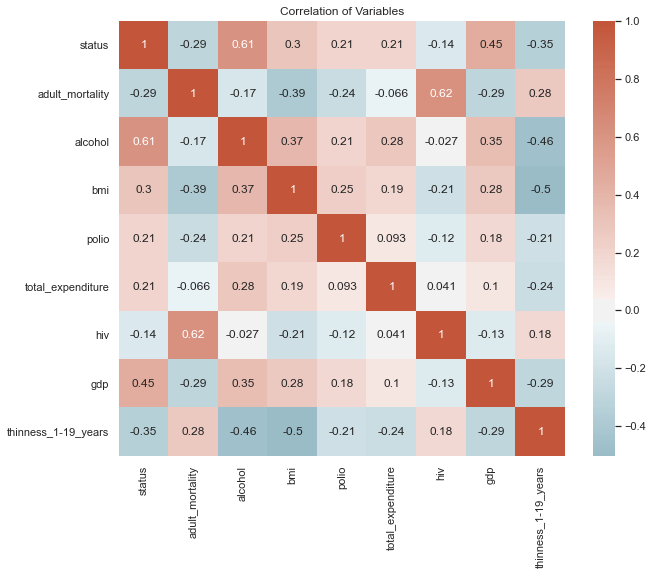

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
polio: 9.29539995443739
bmi: 5.767103302198332
total_expenditure: 5.311440611706926
alcohol: 4.336057087953384
adult_mortality: 4.087803471338009
thinness_1-19_years: 2.3793718608791776
status: 2.251554975708585
hiv: 1.744480841160413
gdp: 1.7294666048663272

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied

Assumption 3: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.0235333227473813
Little to no autocorrelation 

Assumption satisfied

Assumption 4: Homoskedasticity of Error Terms
Residuals should have relative constant variance


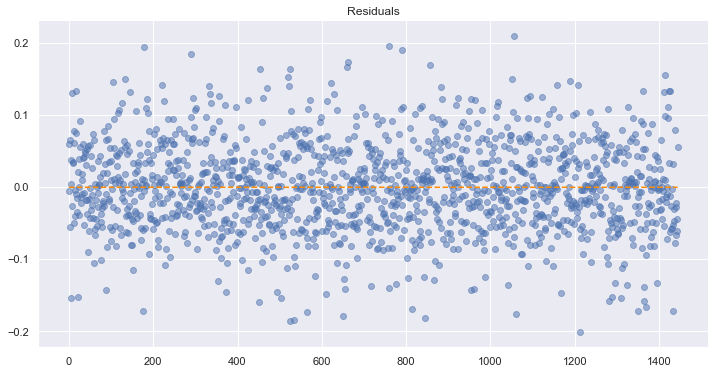

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 501.33187426512893,
 'pvalue for LM': 3.6434212820434795e-103,
 'F stats': 84.76527238194998,
 'pvalue for Fstats': 2.9212406789373056e-126}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 3.688139067068972e-05
Residuals are not normally distributed


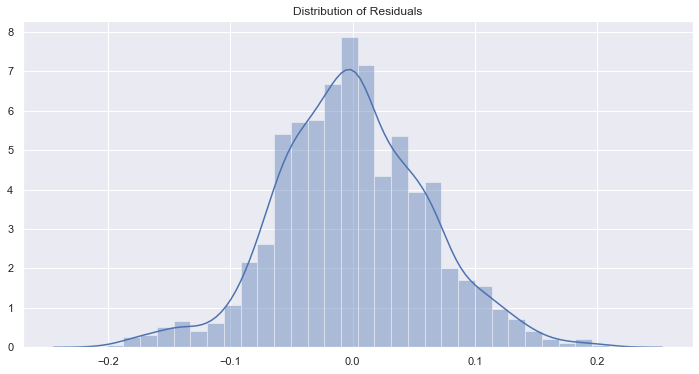


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


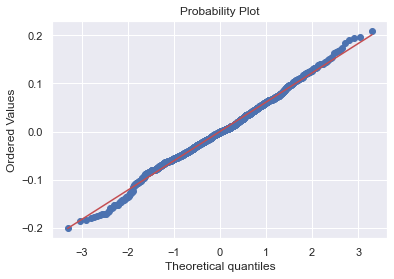


In fact outliers are super significant. Probably it is better to split your dataset into 2 different ones.


{'Satisfied': ['Multicollinearity', 'Autocorrelation'],
 'Potentially': ['Linearity', 'Autocorrelation'],
 'Violated': ['Normality', 'Sub-Normality']}

In [62]:
tester=ast(X_nez,y_norm)
tester.run_all()

(array([ 13.,  11.,  40.,  98., 212., 369., 436., 202.,  55.,   9.]),
 array([-0.81984526, -0.73845883, -0.6570724 , -0.57568596, -0.49429953,
        -0.4129131 , -0.33152667, -0.25014023, -0.1687538 , -0.08736737,
        -0.00598093]),
 <BarContainer object of 10 artists>)

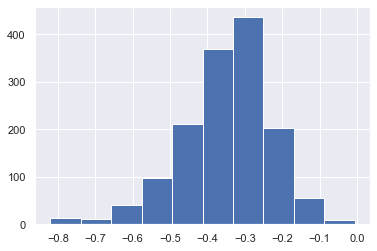

In [63]:
plt.hist(tester.predictions)